<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-0.1">Вывод:</a></span></li></ul></li><li><span><a href="#Шаг-2.-Подготовка-данных" data-toc-modified-id="Шаг-2.-Подготовка-данных-1">Шаг 2. Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-дубликаты-и-замена-пропущенных-значений" data-toc-modified-id="Проверка-на-дубликаты-и-замена-пропущенных-значений-1.1">Проверка на дубликаты и замена пропущенных значений</a></span></li><li><span><a href="#Проверка-значений-времени-звонков-и-интернета-равных-0" data-toc-modified-id="Проверка-значений-времени-звонков-и-интернета-равных-0-1.2">Проверка значений времени звонков и интернета равных 0</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.3">Вывод:</a></span></li><li><span><a href="#Выделение-столбика-с-месяцем" data-toc-modified-id="Выделение-столбика-с-месяцем-1.4">Выделение столбика с месяцем</a></span></li><li><span><a href="#Расчет-количества-звонков,-интернета-и-сообщений-по-месяцам-и-объединение-в-одну-таблицу" data-toc-modified-id="Расчет-количества-звонков,-интернета-и-сообщений-по-месяцам-и-объединение-в-одну-таблицу-1.5">Расчет количества звонков, интернета и сообщений по месяцам и объединение в одну таблицу</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.6">Вывод:</a></span></li><li><span><a href="#Расчет-помесячных-общих-расходов" data-toc-modified-id="Расчет-помесячных-общих-расходов-1.7">Расчет помесячных общих расходов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.8">Вывод</a></span></li></ul></li><li><span><a href="#Шаг-3.-Анализ-данных" data-toc-modified-id="Шаг-3.-Анализ-данных-2">Шаг 3. Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1">Вывод:</a></span></li></ul></li><li><span><a href="#Шаг-4.--Гипотезы" data-toc-modified-id="Шаг-4.--Гипотезы-3">Шаг 4.  Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Формулирование-первой-гипотезы" data-toc-modified-id="Формулирование-первой-гипотезы-3.1">Формулирование первой гипотезы</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.2">Вывод:</a></span></li><li><span><a href="#Формулирование-воторой-гипотезы" data-toc-modified-id="Формулирование-воторой-гипотезы-3.3">Формулирование воторой гипотезы</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.4">Вывод:</a></span></li></ul></li><li><span><a href="#Шаг-5.-Общий-вывод" data-toc-modified-id="Шаг-5.-Общий-вывод-4">Шаг 5. Общий вывод</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import display
from scipy import stats as st

calls = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\calls.csv')#Общая информация о звонках
display(calls.head())
calls.info()

internet = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\internet.csv')#Общая информация об интернете
display(internet.head())
internet.info()

messages = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\messages.csv')#Общая информация о сообщениях
display(messages.head())
messages.info()

tariffs = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\tariffs.csv')#Общая информация о тарифах
display(tariffs.head())
tariffs.info()

users = pd.read_csv(r'C:\Users\user\Desktop\Для проектов\users.csv')#Общая информация о пользователях
display(users.head())
users.info()
users['city'].unique()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

### Вывод: 
Для общего анализа выведены по 5 строчек из каждой таблицы и общая информация.
Видно что, практически все столбцы заполнены полностью, за исключением столбца churn_date в users. Это столбец - время, когда клиент отключился от тарифа. Это значит он ушел к конкурентам. Таких клиентов 7,6 %, это немало, причины их ухода неизвестны, воспользуемся их значениями при расчете. Также видно, что количесвто звонков, сообщений и мегабайт разное. Это логично, каждый человек по разному использует тариф. Выборка городов показывает довольно большое количесвто для всего навсего 500 человек. Какой-то непонятный столбец "Unnamed: 0" в табличке с интернетом, пока не понимаю что это, но думаю в общем он не мешает для анализа.

## Шаг 2. Подготовка данных

### Проверка на дубликаты и замена пропущенных значений

In [2]:
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())
print(users.duplicated().sum())# Проверка показала дубликатов нет нигде

users['churn_date'] = users['churn_date'].fillna('0')# Замена пропусков на ноль


0
0
0
0


### Проверка значений времени звонков и интернета равных 0

In [3]:
print(calls.query('duration != 0')['duration'].count())# Проверка количества времени звонков со значением ноль, 
#получается 39613, это 19,55% от общего количества
print(internet.query('mb_used != 0')['mb_used'].count())# Проверка количества интернета со значением ноль, 
#получается 19598, это 13,12% от общего количества

calls = calls.query('duration != 0')# удаление значений с нулями
calls['duration'] = np.ceil(calls['duration'])# округление в большую сторону, для дальнейшего подсчета стоимости услуг
#display(calls.head())# проверка

internet = internet.query('mb_used != 0')# удаление значений с нулями
internet['mb_used'] = np.ceil(internet['mb_used'])# округление в большую сторону, для дальнейшего подсчета стоимости услуг
#display(internet.head())# проверка

162994
129798


### Вывод: 
В результате проверки были обнаружены нулевые значения времени разговора и пользования интернетом. Эти нули можно объяснить техническим сбоем или не отвеченным звонком, не загруженой (зависшей) страницей. В любом случае, абонент не воспользовался услугой, платить за не нужно, а стоимость она не влияет. А вот на метрики (среднее, медиана) еще как повлияет, потому 20% и 13% это очень много. Удаляем эти значения.

### Выделение столбика с месяцем

In [4]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')# перевод в формат даты
calls['mouns'] = calls['call_date'].dt.month# выделение месяца в отдельный столбец
#display(calls.head())#Проверка

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')# перевод в формат даты
internet['mouns'] = internet['session_date'].dt.month# выделение месяца в отдельный столбец
#display(internet.head())#Проверка

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')# перевод в формат даты
messages['mouns'] = messages['message_date'].dt.month# выделение месяца в отдельный столбец
#display(messages.head())#Проверка

### Расчет количества звонков, интернета и сообщений по месяцам и объединение в одну таблицу

In [5]:
user_calls = calls.pivot_table(index=['user_id', 'mouns'], values='duration', aggfunc=['sum', 'count']).reset_index()
user_calls.columns = ['user_id', 'mouns','duration','id_calls']
user_calls['duration'] = user_calls['duration'].astype('int')
#display(user_calls.head())#Проверка

user_internet = internet.pivot_table(index=['user_id', 'mouns'], values='mb_used', aggfunc=['sum', 'count']).reset_index()
user_internet.columns = ['user_id', 'mouns','mb_used','id_internet']
#display(user_internet.head())#Проверка

user_messages = messages.pivot_table(index=['user_id', 'mouns'], values='message_date', aggfunc='count').reset_index()
user_messages.columns = ['user_id', 'mouns','massages']
user_messages['massages'] = user_messages['massages'].astype('int')
#display(user_messages.head())#Проверка


df = user_calls.merge(user_internet, on=['user_id', 'mouns'], how='outer')#поочереди присоединяем одну таблицу к другой
df1 = df.merge(user_messages, on=['user_id', 'mouns'], how='outer')
df2 = users.merge(df1, on=['user_id'], how='outer')
tariffs.columns = ['messages_included', 'mb_per_month_included','minutes_included', 'rub_monthly_fee', 'rub_per_gb',
                        'rub_per_message', 'rub_per_minute', 'tariff']# переименовываем столбец для объединения

svod = df2.merge(tariffs, on=['tariff'], how='outer')

display(df2.head())
display(svod.head())# проверка таблицы

#svod['mouns'] = svod['mouns'].astype('int64')


svod.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mouns,duration,id_calls,mb_used,id_internet,massages
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,17.0,2256.0,4.0,22.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,28.0,23257.0,44.0,60.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,41.0,14016.0,28.0,75.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,42.0,14070.0,27.0,81.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,46.0,14581.0,25.0,57.0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mouns,duration,...,mb_used,id_internet,massages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,...,2256.0,4.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,...,23257.0,44.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,...,14016.0,28.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,...,14070.0,27.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,...,14581.0,25.0,57.0,1000,30720,3000,1950,150,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3216 non-null   int64  
 1   age                    3216 non-null   int64  
 2   churn_date             3216 non-null   object 
 3   city                   3216 non-null   object 
 4   first_name             3216 non-null   object 
 5   last_name              3216 non-null   object 
 6   reg_date               3216 non-null   object 
 7   tariff                 3216 non-null   object 
 8   mouns                  3214 non-null   float64
 9   duration               3168 non-null   float64
 10  id_calls               3168 non-null   float64
 11  mb_used                3201 non-null   float64
 12  id_internet            3201 non-null   float64
 13  massages               2717 non-null   float64
 14  messages_included      3216 non-null   int64  
 15  mb_p

### Вывод:
Сначала выделили стобцы с месяцем, потому что расчет должен быть помесячно. Затем сделали сводные таблицы с расчетом звонков, интернета и сообщений по месяцам. Далее объединяем таблицу в одну по id и месяцам для проведения расчетов. Для проведения расчетов заменил в стобцах duration, massages, mb_used на целочисленный. Но в результате объединения таблиц, в этих столбцах появились пропуски и тип изменился на float64. Пропуски появились из-за разного количества звонков, интернета и сообщений. Кто то мог звонить и пользоватьсья интернетом, а сообщений не писать например, значит ячейка появиться, а значение нет. Поэтому корректно считаю заполнить нулями такие места, и уже оставить. Ноль - значит не звонил, не писал, интернетом не пользовался. Соответственно после заполнения нулями далее снова поменял на тип int необходимые столбцы. 

### Расчет помесячных общих расходов

In [6]:
svod['duration'] = svod['duration'].fillna('0')# Заменяем пропущенные значения на ноль и меняем тип данных
svod['duration'] = svod['duration'].astype('int')
svod['massages'] = svod['massages'].fillna('0')
svod['massages'] = svod['massages'].astype('int')
svod['mb_used'] = svod['mb_used'].fillna('0')
svod['mb_used'] = svod['mb_used'].astype('int')
svod['mouns'] = svod['mouns'].fillna('0')
svod['mouns'] = svod['mouns'].astype('int')

#svod.info()#Проверка

def mouns_viruchka_rachcet(svod):# функция для расчета месячного дохода
    total = 0
    total += svod['rub_monthly_fee']
    if (svod['duration'] - svod['minutes_included']) > 0:
        total += (svod['duration'] - svod['minutes_included']) * svod['rub_per_minute']
    if (svod['massages'] - svod['messages_included']) > 0:
        total += (svod['massages'] - svod['messages_included']) * svod['rub_per_message']
    if (svod['mb_used'] - svod['mb_per_month_included']) > 0:
        total += np.ceil(((svod['mb_used'] - svod['mb_per_month_included']) / 1024)) * svod['rub_per_gb']
    return total

svod['mouns_viruchka'] = svod.apply(mouns_viruchka_rachcet, axis = 1)
display(svod.head())


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mouns,duration,...,id_internet,massages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,mouns_viruchka
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,159,...,4.0,22,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,172,...,44.0,60,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,340,...,28.0,75,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,408,...,27.0,81,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,466,...,25.0,57,1000,30720,3000,1950,150,1,1,1950.0


### Вывод
Заменил все пропуски и поменял типы данных. Сделал функцию которая считает сколько денег клиент принес в месяц. Добавил такой столбец в таблицу.

## Шаг 3. Анализ данных

In [7]:
svod_ultra = svod.query('tariff == "ultra"')#разделяю таблицу по тарифам для более детального изучения каждого тарифа
svod_smart = svod.query('tariff == "smart"')

svod_ultra.query('duration != 0')['duration'].describe()

count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: duration, dtype: float64

In [8]:
np.var(svod_ultra.query('duration != 0')['duration'], ddof=1)# дисперсия, зная что это выборка, вношу поправку


93338.4282914109

In [9]:
print(305.513385 * 305.513385)# беру квадрат стандартного отклонения, очень большая сходмость

93338.42841415825


In [10]:
svod_smart.query('duration != 0')['duration'].describe()

count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: duration, dtype: float64

In [11]:
np.var(svod_smart.query('duration != 0')['duration'], ddof=1)#дисперсия, зная что это выборка, вношу поправку

35718.128533936935

In [12]:
print(188.992403 * 188.992403)# беру квадрат стандартного отклонения, очень большая сходмость

35718.12839171441


In [13]:
svod_ultra.query('massages != 0')['massages'].describe()

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: massages, dtype: float64

In [14]:
np.var(svod_ultra.query('massages != 0')['massages'])#здесь убрал поправку ,чтобы сравнить, отличие уже есть

2107.005523515688

In [15]:
print(45.931026 * 45.931026)# беру квадрат стандартного отклонения, очень большая сходмость(если брать поправку). 
#Поправка дает супер попадание, без нее тоже довольно близко

2109.6591494126765


In [16]:
svod_smart.query('massages != 0')['massages'].describe()

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: massages, dtype: float64

In [17]:
np.var(svod_smart.query('massages != 0')['massages'], ddof=1)# дисперсия

717.5942011753527

In [18]:
svod_ultra.query('mb_used != 0')['mb_used'].describe()

count      974.000000
mean     19706.979466
std       9937.127298
min        366.000000
25%      12073.750000
50%      19427.500000
75%      26936.250000
max      49789.000000
Name: mb_used, dtype: float64

In [19]:
np.var(svod_ultra.query('mb_used != 0')['mb_used'], ddof=1)# дисперсия

98746498.9327742

In [20]:
svod_smart.query('mb_used != 0')['mb_used'].describe()

count     2227.000000
mean     16243.763359
std       5860.041941
min        202.000000
25%      12677.000000
50%      16533.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

In [21]:
np.var(svod_smart.query('mb_used != 0')['mb_used'], ddof=1)# дисперсия

34340091.553589545

In [22]:
svod_ultra['mouns_viruchka'].describe()

count     986.000000
mean     2070.943205
std       378.629673
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: mouns_viruchka, dtype: float64

In [23]:
np.var(svod_ultra['mouns_viruchka'], ddof=1)# дисперсия

143360.42925834973

In [24]:
svod_smart['mouns_viruchka'].describe()

count    2230.000000
mean     1294.305381
std       820.900496
min       550.000000
25%       550.000000
50%      1037.000000
75%      1750.000000
max      6770.000000
Name: mouns_viruchka, dtype: float64

In [25]:
np.var(svod_smart['mouns_viruchka'], ddof=1)# дисперсия

673877.6236139103

In [26]:
svod.pivot_table(index='tariff',  
                 values=['duration', 'mb_used', 'massages'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')# Расчет тех же показателей, только через сводные таблицы

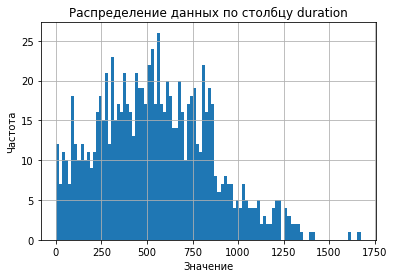

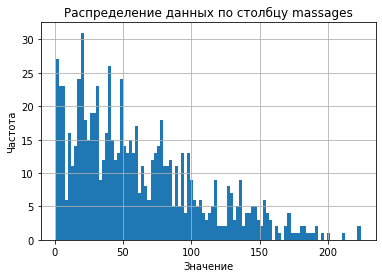

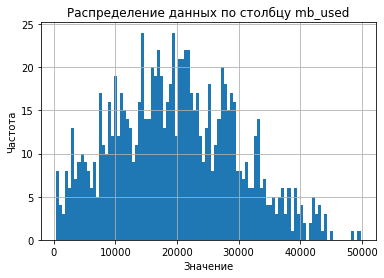

Text(0, 0.5, 'Частота')

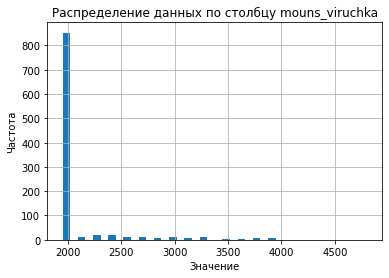

In [27]:
cols=['duration', 'massages', 'mb_used']# цикл для постройки графиков, нули отброшены путем регулировки шкалы
for col in cols:
    Q1=svod_ultra[col].quantile(0.01)
    Q3=svod_ultra[col].quantile(0.99)
    data_temp = svod_ultra.loc[svod_ultra[col]<Q3, col]
    data_temp = svod_ultra.loc[svod_ultra[col]>Q1, col]
    data_temp.hist(bins=100)
    plt.title('Распределение данных по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()
    
svod_ultra['mouns_viruchka'].hist(bins = 40)# гистограмма отдельно сделана, иначе отбрасываются минимальные значения
#, а это как раз значение тарифа
plt.title('Распределение данных по столбцу mouns_viruchka')
plt.xlabel('Значение')
plt.ylabel('Частота')

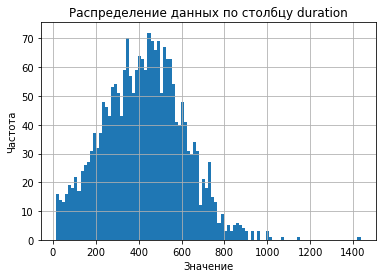

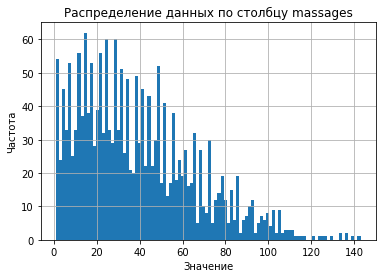

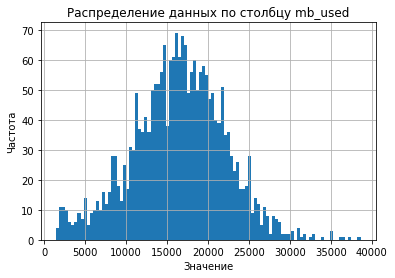

Text(0, 0.5, 'Частота')

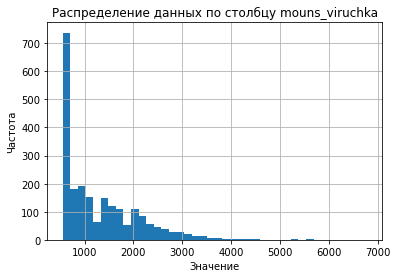

In [28]:
cols=['duration', 'massages', 'mb_used']
for col in cols:
    Q1=svod_smart[col].quantile(0.01)
    Q3=svod_smart[col].quantile(0.99)
    data_temp = svod_smart.loc[svod_smart[col]<Q3, col]
    data_temp = svod_smart.loc[svod_smart[col]>Q1, col]
    data_temp.hist(bins=100)
    plt.title('Распределение данных по столбцу ' + col)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.show()
    
svod_smart['mouns_viruchka'].hist(bins = 40)# гистограмма отдельно сделана, иначе отбрасываются минимальные значения
#, а это как раз значение тарифа
plt.title('Распределение данных по столбцу mouns_viruchka')
plt.xlabel('Значение')
plt.ylabel('Частота')

### Вывод:
Если не вдаваться в кучу конкретных значений и точных сравнений, то можно сделать удивительный вывод на мой взгляд. В общем если смотреть медианы и средние, они относительно схожи между собой, разброс есть конечно но не критичный, стандартное отклонение показывает тоже что все люди по разному пользуются услугами, что логично. Клиенты тарифа ультра используют больше минут, сообщений и интернета, что тоже логично. Но вот что меня поразило, это то что ненамного больше и если брать в среднем, то намного меньше чем позволяют им лимиты этого тарифа ультра. Так же очень важно отметить, что средние и медиантные значения клентов ультра немного выше лимитов тарифа смарт (кроме интернета), интернет выше, но тоже я бы не сказал что намного. Без расчетов видно, что даже если не укладываться в тариф смарт, и по прайсу переплачивать, для большинства клиентов ультра будет это выгоднее.
Получается что очень много людей тарифа ультра переплачивают и не следят за своим тарифом, также и на тарифе смарт есть люди которые платят более 1950 рублей и тоже не спешат менять тариф.
Большинство людей укладываются в лимиты своего тарифа.
Также можно сказать что самая востребованная услуга - интернет, а вот сообщения уходят в прошлый век.
Тут можно еще долго изучать, сколько людей переплачивают и так далее, но это наверное не входит в задачу.
Гистограммы  по столбцам 'duration', 'mb_used' в обоих тарифах несмотря на "колючесть" имеют четко нормальное распределение. Гистограмма столбца 'massages' можно с натяжкой сказать нормального распределение со смещением вправо. Вообще сообщения настолько умирающая функция на смартфоне, что даже незнаю должна ли она быть строго нормального распределения. Гистограмма по столбцу mouns_viruchka показывает, что в основном люди платят абонентскую плату, поэтому невозможно понять нормального типа или нет. Одно из условий сравнения гипотез гласит, что должно быть нормальное распределение, принимаем его таким, так как этот столбец получен на основе стобцов с нормальным распределением. 

## Шаг 4.  Гипотезы

### Формулирование первой гипотезы
Н0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны/
Н1 -средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Нулевая гипотеза должна исходить из равенства. Я действую в рамках сравнения двух генеральных совокупностей, то есть две совокупности для тарифов смарт и ультра, их выручка описывается в соответствующем столбце, его и сравниваем

In [29]:
alpha = .05# Выбрал типовой уровень (пробовал и 0,01 результат тот же) думаю сложность была бы если бы с одним 
#показателем проходила, а с другим нет, а так все одинаково

results = st.ttest_ind(svod_ultra['mouns_viruchka'], svod_smart['mouns_viruchka'], equal_var = False)# дисперсия 
#для столбцов посчитана выше, она сильно отличается, поэтому False

print('p-значение:', results.pvalue)# 

if results.pvalue < alpha:# :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


### Вывод: 
Нулевая гипотеза не подтвердилась, что и логично, показатели отличаются

### Формулирование воторой гипотезы
Н0 - средняя выручка пользователей из Москвы и регионов равны/
Н1 -средняя выручка пользователей Москвы и регионов различается. Нулевая гипотеза должна исходить из равенства. Я действую в рамках сравнения двух генеральных совокупностей, необходимо получить подходящие столбцы

In [30]:
svod_moscva = svod.query('city == "Москва"')# таблица для проверки гипотезы с Москвой
svod_region = svod.query('city != "Москва"')# таблица для проверки гипотезы с регионами
np.var(svod_moscva['mouns_viruchka'], ddof=1)# дисперсия

566183.0292184264

In [31]:
np.var(svod_region['mouns_viruchka'], ddof=1)# дисперсия, разница порядка 13% между дисперсиями, значит тоже False

656697.9582266718

In [32]:
alpha = .05# Выбрал типовой уровень (пробовал и 0,01 результат тот же) думаю сложность была бы если бы с одним 
#показателем проходила, а с другим нет, а так все одинаково

results = st.ttest_ind(svod_moscva['mouns_viruchka'], svod_region['mouns_viruchka'], equal_var = False)# 

print('p-значение:', results.pvalue)# 

if results.pvalue < alpha:# :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


### Вывод:
Нулевая гипотеза подтверждена ,значит траты в Москве и регионах одинаковые. Это противоречит жизненому опыту, хотя бы 
потому, что тарифы для москвы и регионов разные, здесь это не учтено. Но доверимся исходным данным и расчету. 

## Шаг 5. Общий вывод


Была проведена подготовка данных, удалены мешающие значения, посчитанны месячные расходы, объеденены таблицы, заполнены пропущенные значения. Был проведен расчет ежемесячных расходов абонентов с использованием функции. Анализ гистограмм и метрик показал, что имеется нормальное распределение. по результатам я делаю вывод, что оператору необходимы оба тарифа, несмотря на то, что можно сказать что один тариф в среднем приносит больше выручки, а другой тариф например  имеет больше абонентов. Я думаю что самая важная выгода оператора, это то что он как бы разрывает клиентов между двумя тарифами, то есть в обоих тарифах есть люди, которым было бы более выгодно перейти на другой, но они не переходят(слишком заняты, считают этот вопрос незначительным) и из-за этого теряют деньги. С каждого по рублю, получится большая сумма. Думаю выгода оператора на первом месте, поэтому наличие именно двух тарифов дает такую возможность. А вообще сейчас другие тарифы, когда сам себе выбираешь опции, это разрушит такую систему (хотя там наверное свои хитрости). Далее были проверены две системы гипотез, которые показали, что средние выручки тарифов не равны и что средние выручки в Москве и в регинах равны. 